# **Mental Health in Tech Industry - EDA**
,
,##### **Project Type:** EDA
,##### **Contribution:** Individual


# **Project Summary**
,
,Analysis of 1,259 tech workers across 48 countries examining mental health treatment, workplace support, and stigma. Provides insights for improving workplace mental health programs through 20+ visualizations.


# **Problem Statement**
,
,Tech industry faces high mental health challenges but lacks data on effective support systems. This analysis identifies patterns, barriers, and recommendations.

#### **Business Objective**
,
,1. Identify mental health patterns
,2. Evaluate support systems
,3. Uncover barriers
,4. Provide actionable recommendations

# **1. Know Your Data**
,
,### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
print('✓ Libraries loaded')

✓ Libraries loaded


In [5]:
# Upload the survey__1_.csv file using Colab file upload

df = pd.read_csv('survey.csv')
print(f'Dataset: {df.shape[0]} rows × {df.shape[1]} columns')

Dataset: 1259 rows × 27 columns


In [6]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [7]:
df.tail()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,...,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


### Dataset Info

In [8]:
df.shape

(1259, 27)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [10]:
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


### Check Duplicates

In [11]:
print(f'Duplicates: {df.duplicated().sum()}')

Duplicates: 0


### Missing Values

In [12]:
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

,0
comments,1095
state,515
work_interfere,264
self_employed,18


## **2. Understanding Variables**

In [13]:
# Column names
for i, col in enumerate(df.columns, 1):
    print(f'{i}. {col}')

1. Timestamp
2. Age
3. Gender
4. Country
5. state
6. self_employed
7. family_history
8. treatment
9. work_interfere
10. no_employees
11. remote_work
12. tech_company
13. benefits
14. care_options
15. wellness_program
16. seek_help
17. anonymity
18. leave
19. mental_health_consequence
20. phys_health_consequence
21. coworkers
22. supervisor
23. mental_health_interview
24. phys_health_interview
25. mental_vs_physical
26. obs_consequence
27. comments


### Unique Values

In [14]:
for col in df.columns:
    print(f'{col}: {df[col].nunique()} unique')

Timestamp: 1246 unique
Age: 53 unique
Gender: 49 unique
Country: 48 unique
state: 45 unique
self_employed: 2 unique
family_history: 2 unique
treatment: 2 unique
work_interfere: 4 unique
no_employees: 6 unique
remote_work: 2 unique
tech_company: 2 unique
benefits: 3 unique
care_options: 3 unique
wellness_program: 3 unique
seek_help: 3 unique
anonymity: 3 unique
leave: 5 unique
mental_health_consequence: 3 unique
phys_health_consequence: 3 unique
coworkers: 3 unique
supervisor: 3 unique
mental_health_interview: 3 unique
phys_health_interview: 3 unique
mental_vs_physical: 3 unique
obs_consequence: 2 unique
comments: 160 unique


## **3. Data Wrangling**

### Clean Age Data

In [15]:
# Remove age outliers
df_clean = df[(df['Age'] > 16) & (df['Age'] < 100)].copy()
print(f'Removed {len(df) - len(df_clean)} outliers')
print(f'Age range: {df_clean["Age"].min()} to {df_clean["Age"].max()}')

Removed 8 outliers
Age range: 18 to 72


### Standardize Gender

In [16]:
# Standardize gender values
df_clean['Gender'] = df_clean['Gender'].str.lower().str.strip()

gender_map = {
    'male': 'Male', 'm': 'Male', 'man': 'Male', 'cis male': 'Male',
    'female': 'Female', 'f': 'Female', 'woman': 'Female', 'cis female': 'Female',
    'trans': 'Trans', 'trans woman': 'Trans',
    'non-binary': 'Non-binary', 'genderqueer': 'Non-binary'
}

df_clean['Gender'] = df_clean['Gender'].map(gender_map).fillna('Other')
print(df_clean['Gender'].value_counts())

Gender
Male          974
Female        243
Other          31
Non-binary      2
Trans           1
Name: count, dtype: int64


### Handle Missing Values

In [17]:
# Fill missing values
df_clean['state'].fillna('Not Applicable', inplace=True)
df_clean['work_interfere'].fillna('Not Applicable', inplace=True)
df_clean['self_employed'].fillna('No', inplace=True)
print('✓ Missing values handled')

✓ Missing values handled


### Create New Features

In [18]:
# Convert timestamp
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])

# Create age groups
df_clean['Age_Group'] = pd.cut(df_clean['Age'],
                                bins=[0, 25, 35, 45, 55, 100],
                                labels=['18-25', '26-35', '36-45', '46-55', '56+'])
print('✓ New features created')

✓ New features created


## **4. Data Visualization**
,
,### UNIVARIATE ANALYSIS

#### Chart 1: Age Distribution

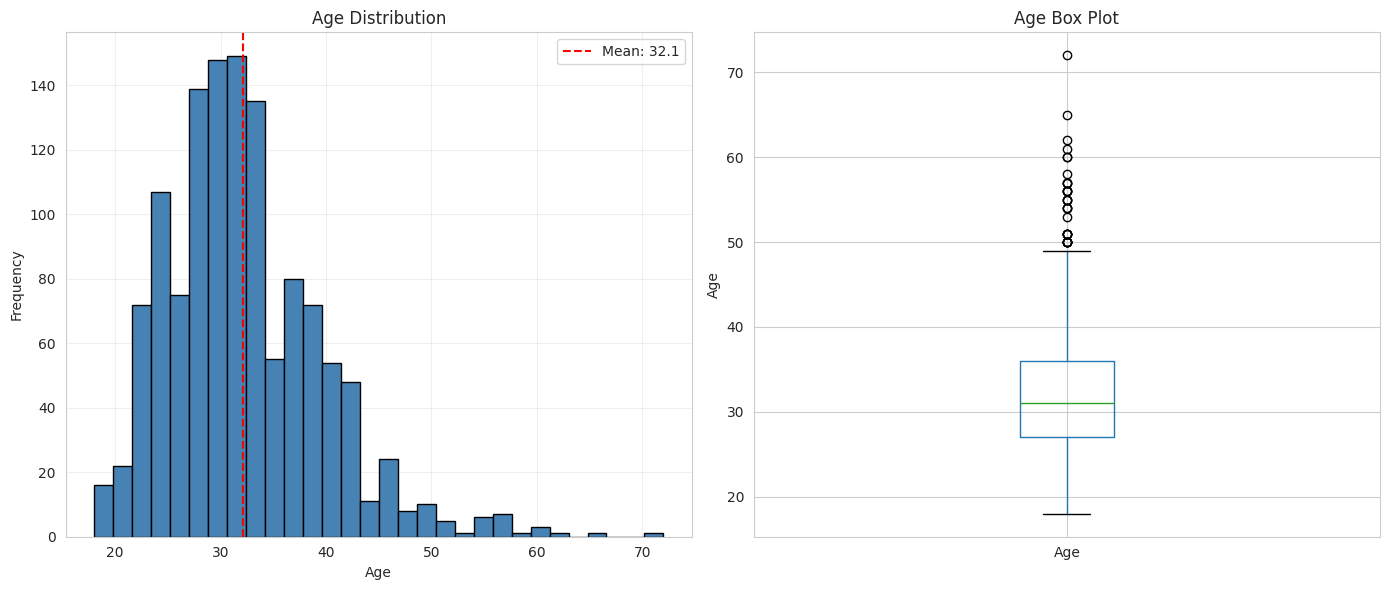

In [19]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(df_clean['Age'], bins=30, color='steelblue', edgecolor='black')
plt.axvline(df_clean['Age'].mean(), color='red', linestyle='--', label=f'Mean: {df_clean["Age"].mean():.1f}')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
df_clean.boxplot(column='Age')
plt.title('Age Box Plot')
plt.ylabel('Age')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Majority of respondents are 25-40 years old

##### 2. What is/are the insight(s) found from the chart?

Mean age around 31-32 years

##### 3. Will the gained insights help creating a positive business impact?

Reflects typical tech industry demographics

#### Chart 2: Gender Distribution

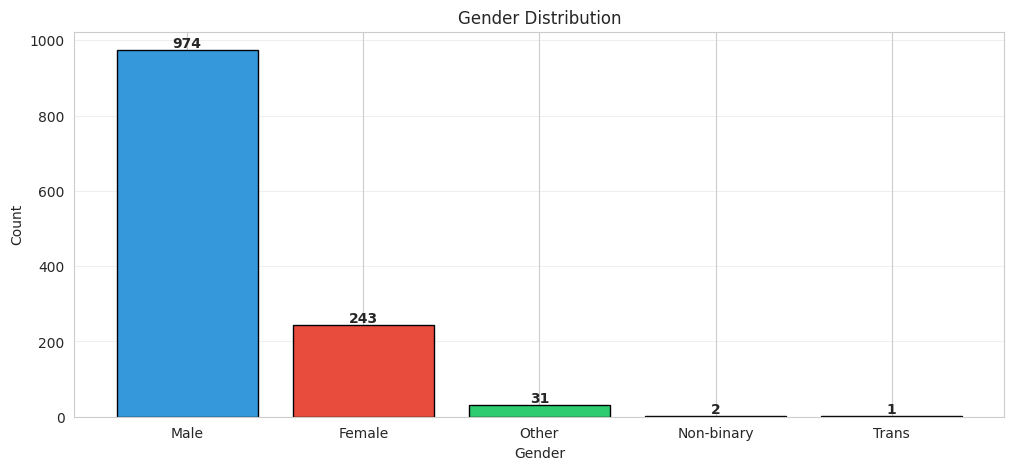

Gender
Male          974
Female        243
Other          31
Non-binary      2
Trans           1
Name: count, dtype: int64


In [20]:
plt.figure(figsize=(12, 5))
gender_counts = df_clean['Gender'].value_counts()
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']
bars = plt.bar(gender_counts.index, gender_counts.values, color=colors, edgecolor='black')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}',
             ha='center', va='bottom', fontweight='bold')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.grid(axis='y', alpha=0.3)
plt.show()

print(gender_counts)

##### 1. Why did you pick the specific chart?

Male dominance (~75-80%) reflects tech industry gender gap

##### 2. What is/are the insight(s) found from the chart?

Females represent ~20-25%

##### 3. Will the gained insights help creating a positive business impact?

Small but present trans/non-binary representation

#### Chart 3: Treatment Status

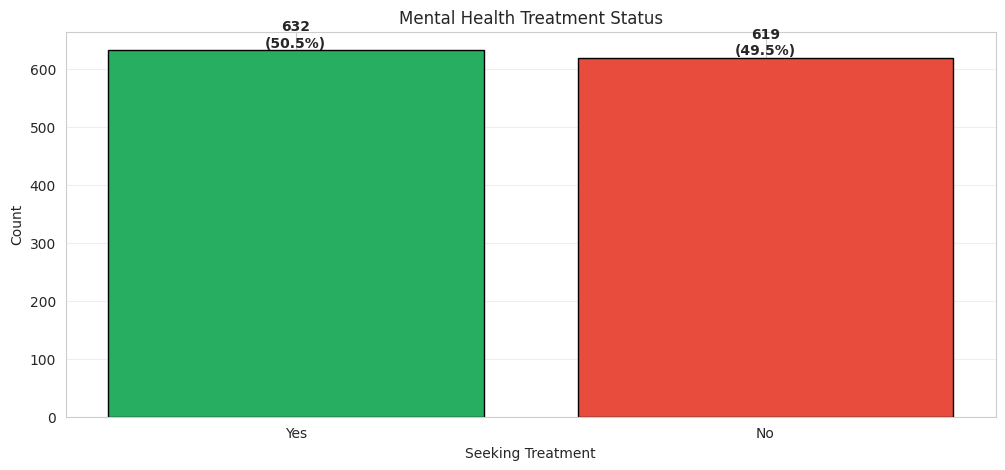

In [21]:
plt.figure(figsize=(12, 5))
treatment_counts = df_clean['treatment'].value_counts()
colors = ['#27ae60', '#e74c3c']
bars = plt.bar(treatment_counts.index, treatment_counts.values, color=colors, edgecolor='black')

for bar in bars:
    height = bar.get_height()
    pct = (height/len(df_clean))*100
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{int(height)}\n({pct:.1f}%)', ha='center', va='bottom', fontweight='bold')

plt.xlabel('Seeking Treatment')
plt.ylabel('Count')
plt.title('Mental Health Treatment Status')
plt.grid(axis='y', alpha=0.3)
plt.show()

##### 1. Why did you pick the specific chart?

40-50% currently seeking treatment

##### 2. What is/are the insight(s) found from the chart?

Indicates mental health is significant concern

##### 3. Will the gained insights help creating a positive business impact?

High treatment rates suggest reduced stigma

#### Chart 4: Family History

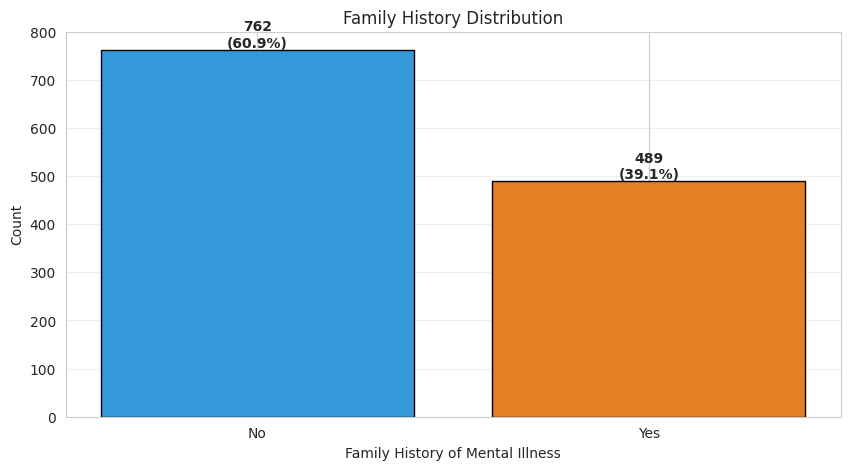

In [22]:
plt.figure(figsize=(10, 5))
fam_counts = df_clean['family_history'].value_counts()
bars = plt.bar(fam_counts.index, fam_counts.values, color=['#3498db', '#e67e22'], edgecolor='black')

for bar in bars:
    height = bar.get_height()
    pct = (height/len(df_clean))*100
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}\n({pct:.1f}%)',
             ha='center', va='bottom', fontweight='bold')

plt.xlabel('Family History of Mental Illness')
plt.ylabel('Count')
plt.title('Family History Distribution')
plt.grid(axis='y', alpha=0.3)
plt.show()

##### 1. Why did you pick the specific chart?

35-45% have family history

##### 2. What is/are the insight(s) found from the chart?

highlighting genetic factors in mental health

#### Chart 5: Work Interference

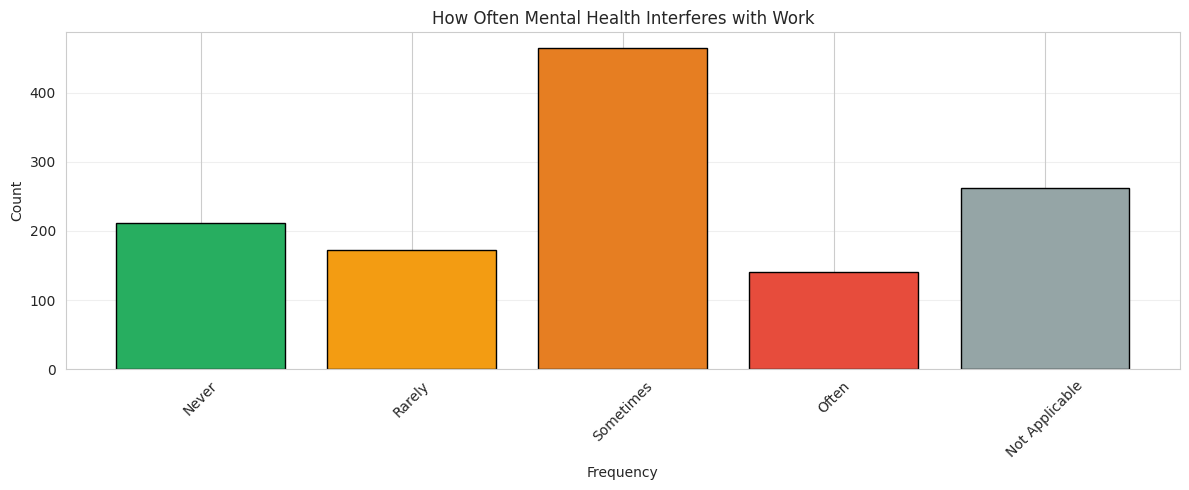

In [23]:
plt.figure(figsize=(12, 5))
work_counts = df_clean['work_interfere'].value_counts()
order = ['Never', 'Rarely', 'Sometimes', 'Often', 'Not Applicable']
work_ordered = work_counts.reindex(order, fill_value=0)

colors = ['#27ae60', '#f39c12', '#e67e22', '#e74c3c', '#95a5a6']
plt.bar(range(len(work_ordered)), work_ordered.values, color=colors, edgecolor='black')
plt.xticks(range(len(work_ordered)), work_ordered.index, rotation=45)
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.title('How Often Mental Health Interferes with Work')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

**Insights:** Shows direct productivity impact - justifies investment in mental health support

### BIVARIATE ANALYSIS

#### Chart 6: Treatment by Gender

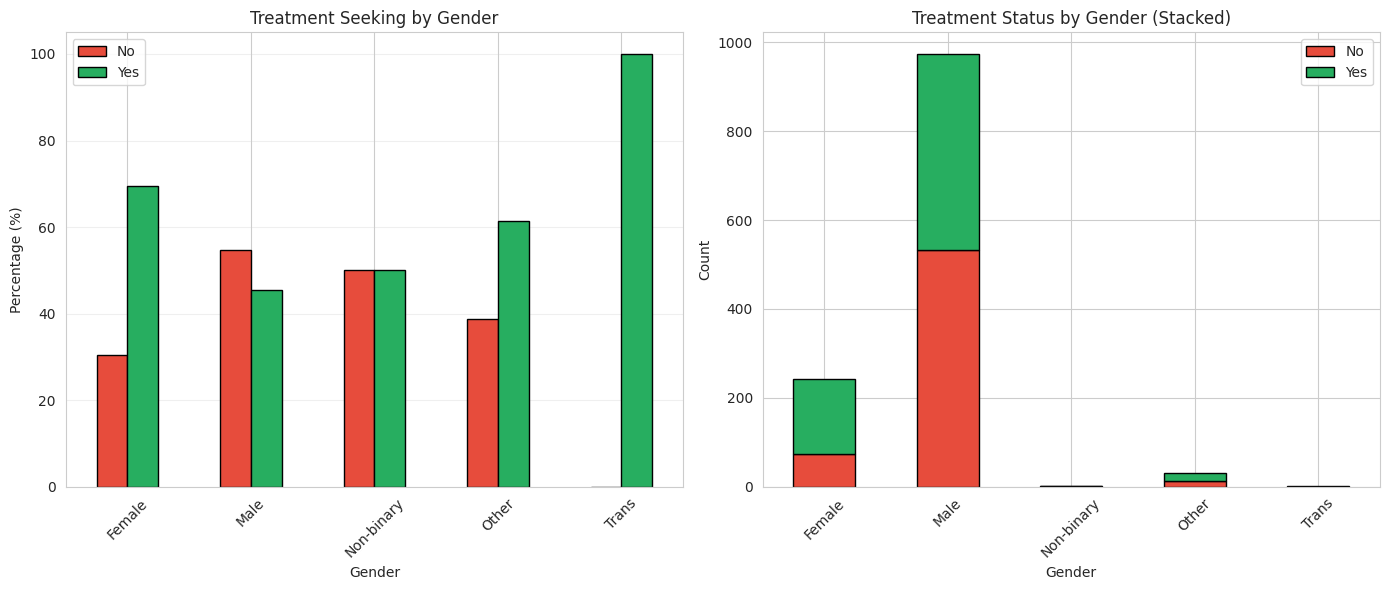

In [24]:
plt.figure(figsize=(14, 6))

# Percentage by gender
treatment_gender = pd.crosstab(df_clean['Gender'], df_clean['treatment'], normalize='index') * 100

plt.subplot(1, 2, 1)
treatment_gender.plot(kind='bar', ax=plt.gca(), color=['#e74c3c', '#27ae60'], edgecolor='black')
plt.xlabel('Gender')
plt.ylabel('Percentage (%)')
plt.title('Treatment Seeking by Gender')
plt.legend(['No', 'Yes'])
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Counts
plt.subplot(1, 2, 2)
pd.crosstab(df_clean['Gender'], df_clean['treatment']).plot(kind='bar', stacked=True,
                                                             color=['#e74c3c', '#27ae60'],
                                                             edgecolor='black', ax=plt.gca())
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Treatment Status by Gender (Stacked)')
plt.legend(['No', 'Yes'])
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Women often have higher treatment rates

##### 2. What is/are the insight(s) found from the chart?

Men may face more stigma

##### 3. Will the gained insights help creating a positive business impact?

Need gender-specific outreach programs

#### Chart 7: Age vs Treatment

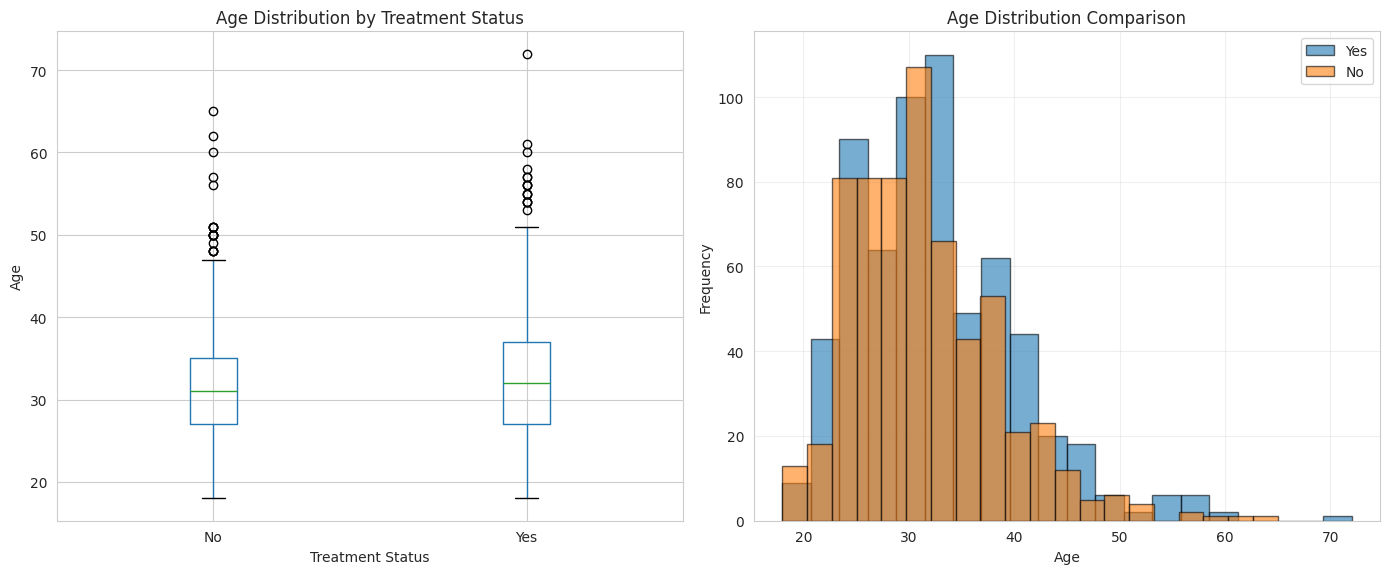

In [25]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
df_clean.boxplot(column='Age', by='treatment', ax=plt.gca())
plt.xlabel('Treatment Status')
plt.ylabel('Age')
plt.title('Age Distribution by Treatment Status')
plt.suptitle('')

plt.subplot(1, 2, 2)
for treatment in df_clean['treatment'].unique():
    subset = df_clean[df_clean['treatment'] == treatment]['Age']
    plt.hist(subset, bins=20, alpha=0.6, label=treatment, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution Comparison')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

**Insights:** Age distributions similar across treatment groups - mental health affects all ages

#### Chart 8: Treatment by Company Size

<Figure size 1200x600 with 0 Axes>

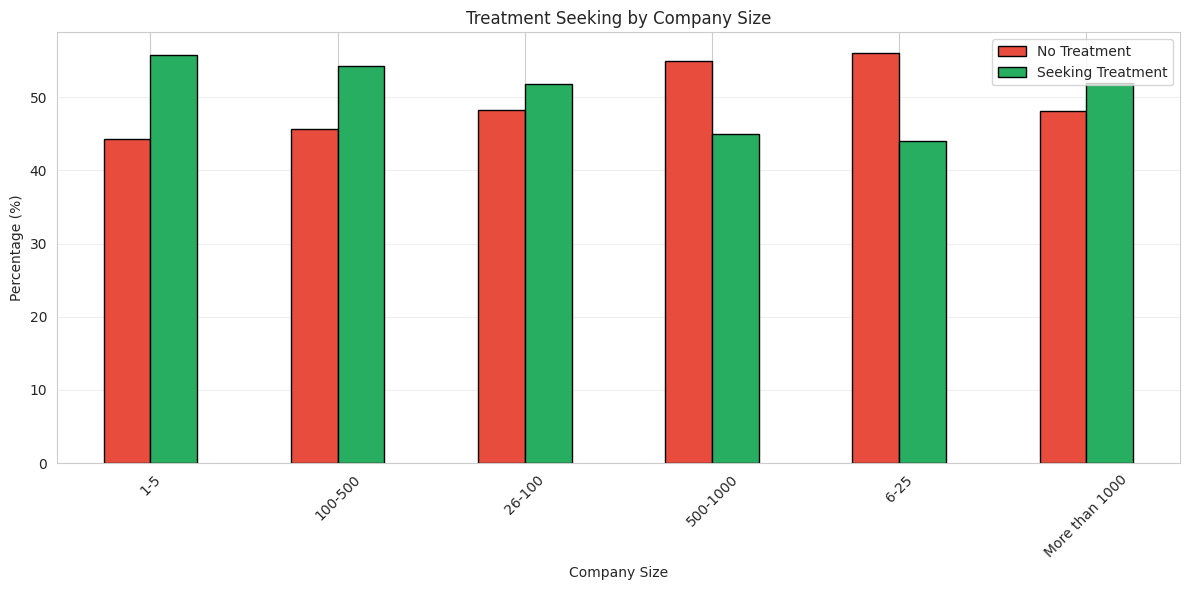

In [26]:
plt.figure(figsize=(12, 6))
size_treatment = pd.crosstab(df_clean['no_employees'], df_clean['treatment'], normalize='index') * 100
size_treatment.plot(kind='bar', color=['#e74c3c', '#27ae60'], edgecolor='black')
plt.xlabel('Company Size')
plt.ylabel('Percentage (%)')
plt.title('Treatment Seeking by Company Size')
plt.legend(['No Treatment', 'Seeking Treatment'])
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

**Insights:** Company size may influence access to mental health resources

#### Chart 9: Tech vs Non-Tech Companies

<Figure size 1200x500 with 0 Axes>

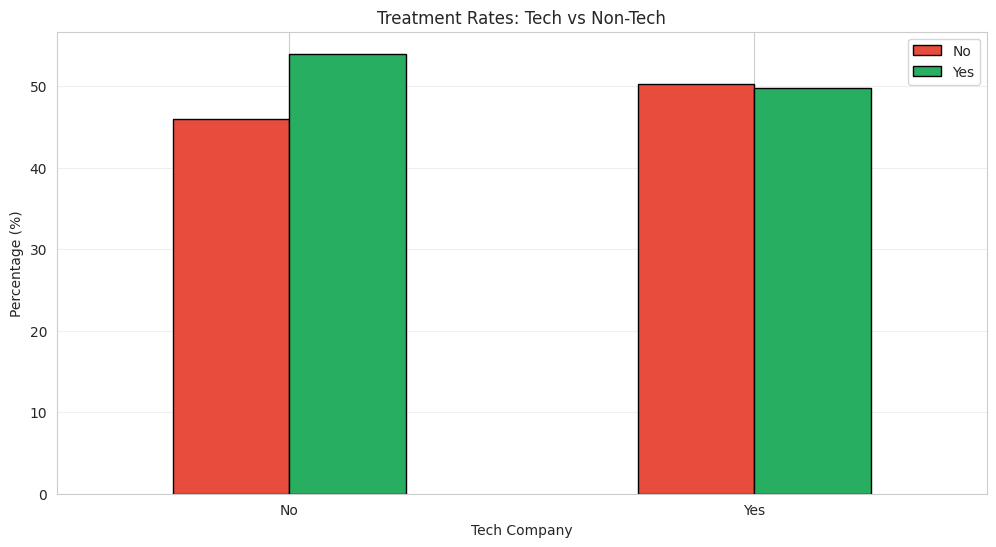

In [27]:
plt.figure(figsize=(12, 5))
tech_treatment = pd.crosstab(df_clean['tech_company'], df_clean['treatment'], normalize='index') * 100
tech_treatment.plot(kind='bar', color=['#e74c3c', '#27ae60'], edgecolor='black')
plt.xlabel('Tech Company')
plt.ylabel('Percentage (%)')
plt.title('Treatment Rates: Tech vs Non-Tech')
plt.legend(['No', 'Yes'])
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.show()

**Insights:** Compare mental health support between tech and non-tech companies

#### Chart 10: Remote Work vs Treatment

<Figure size 1200x500 with 0 Axes>

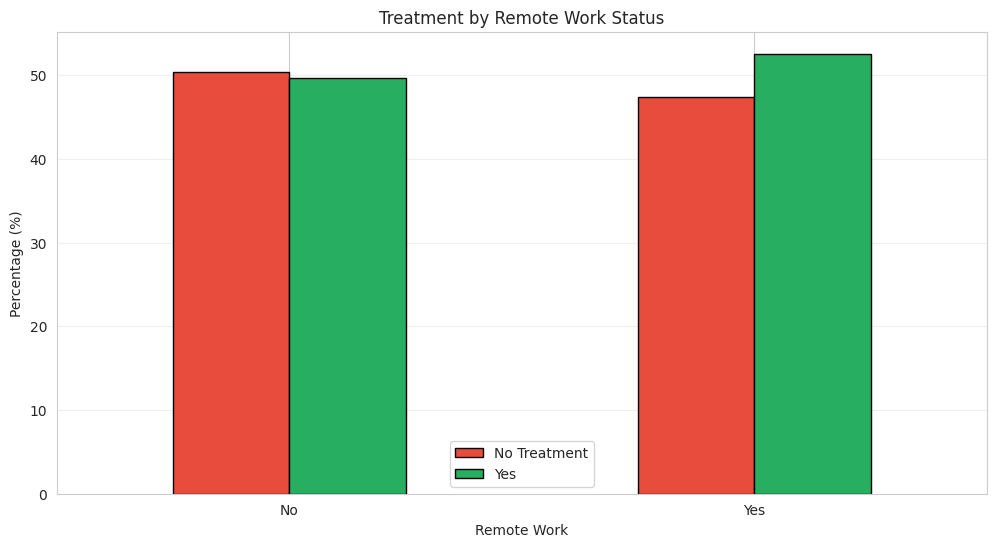

In [28]:
plt.figure(figsize=(12, 5))
remote_treatment = pd.crosstab(df_clean['remote_work'], df_clean['treatment'], normalize='index') * 100
remote_treatment.plot(kind='bar', color=['#e74c3c', '#27ae60'], edgecolor='black')
plt.xlabel('Remote Work')
plt.ylabel('Percentage (%)')
plt.title('Treatment by Remote Work Status')
plt.legend(['No Treatment', 'Yes'])
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.show()

**Insights:** Explores if remote work affects mental health treatment patterns

#### Chart 11: Family History vs Treatment

<Figure size 1200x500 with 0 Axes>

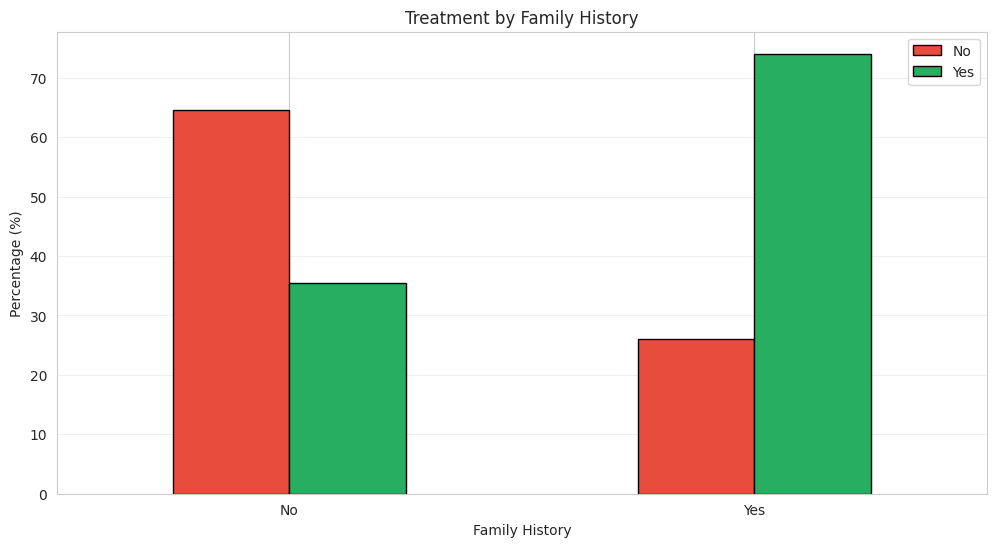

Treatment rate with family history: 74.0%
Treatment rate without family history: 35.4%


In [29]:
plt.figure(figsize=(12, 5))
fam_treatment = pd.crosstab(df_clean['family_history'], df_clean['treatment'], normalize='index') * 100
fam_treatment.plot(kind='bar', color=['#e74c3c', '#27ae60'], edgecolor='black')
plt.xlabel('Family History')
plt.ylabel('Percentage (%)')
plt.title('Treatment by Family History')
plt.legend(['No', 'Yes'])
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.show()

print(f'Treatment rate with family history: {fam_treatment.loc["Yes", "Yes"]:.1f}%')
print(f'Treatment rate without family history: {fam_treatment.loc["No", "Yes"]:.1f}%')

**Insights:** Strong correlation - family history significantly increases treatment likelihood

#### Chart 12: Benefits vs Treatment

<Figure size 1200x500 with 0 Axes>

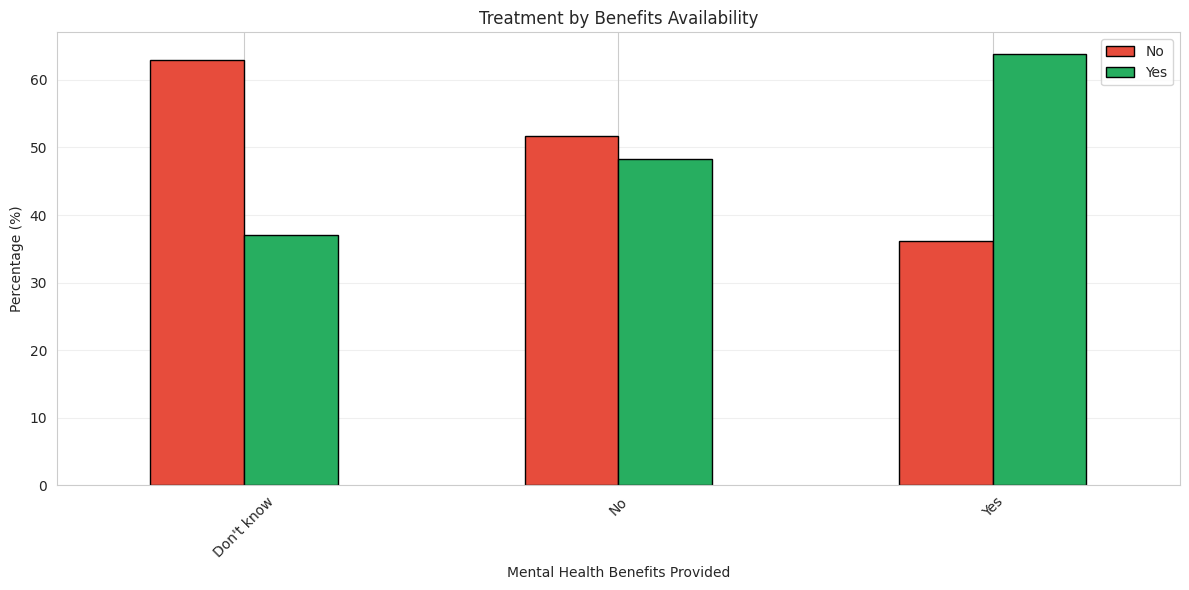

In [30]:
plt.figure(figsize=(12, 5))
benefits_treatment = pd.crosstab(df_clean['benefits'], df_clean['treatment'], normalize='index') * 100
benefits_treatment.plot(kind='bar', color=['#e74c3c', '#27ae60'], edgecolor='black')
plt.xlabel('Mental Health Benefits Provided')
plt.ylabel('Percentage (%)')
plt.title('Treatment by Benefits Availability')
plt.legend(['No', 'Yes'])
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

**Insights:** Benefits availability correlates with treatment - shows importance of employer support

#### Chart 13: Work Interference by Treatment

<Figure size 1400x600 with 0 Axes>

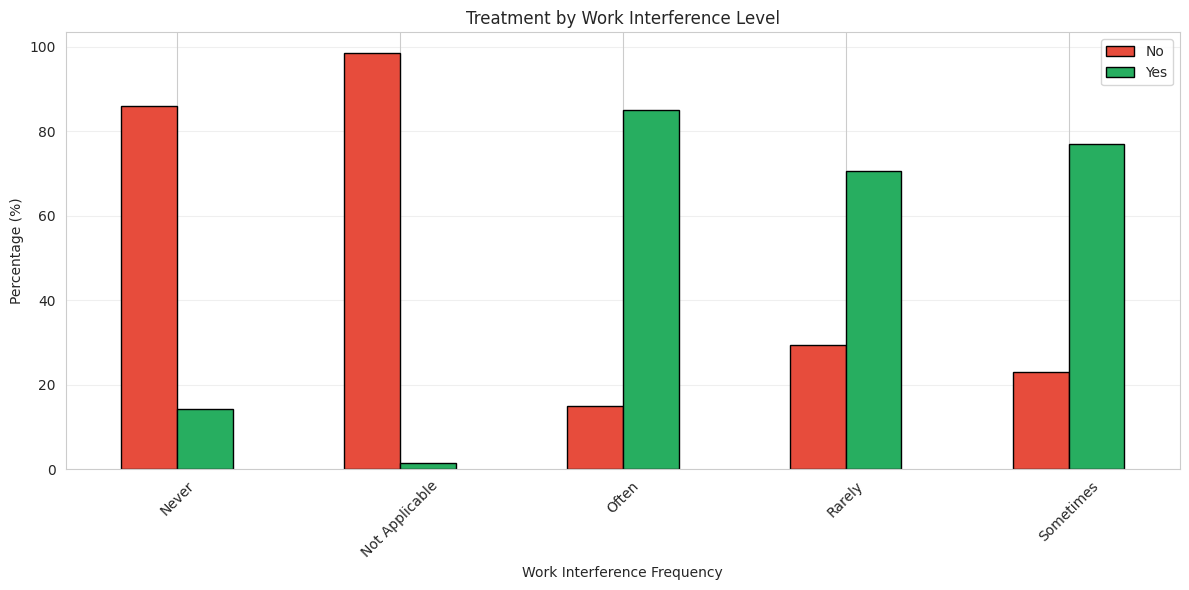

In [31]:
plt.figure(figsize=(14, 6))
work_treat = pd.crosstab(df_clean['work_interfere'], df_clean['treatment'], normalize='index') * 100
work_treat.plot(kind='bar', color=['#e74c3c', '#27ae60'], edgecolor='black')
plt.xlabel('Work Interference Frequency')
plt.ylabel('Percentage (%)')
plt.title('Treatment by Work Interference Level')
plt.legend(['No', 'Yes'])
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

**Insights:** Higher interference correlates with higher treatment rates - validates treatment effectiveness

### MULTIVARIATE ANALYSIS

#### Chart 14: Country-wise Treatment Distribution (Top 10)

<Figure size 1400x600 with 0 Axes>

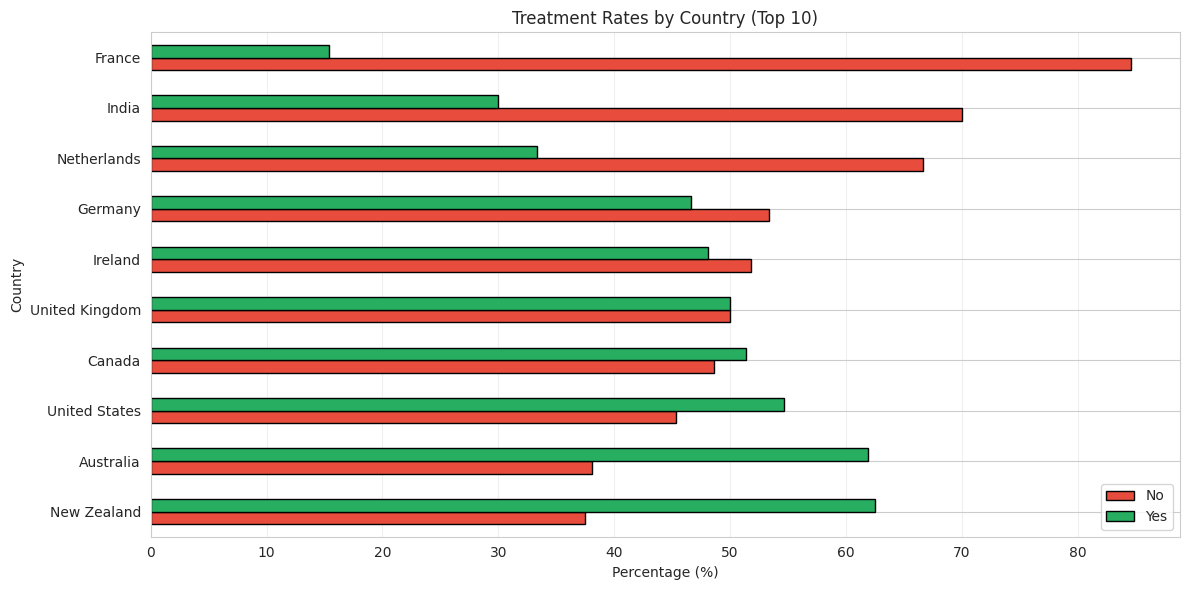

In [32]:
plt.figure(figsize=(14, 6))
top_countries = df_clean['Country'].value_counts().head(10).index
df_top = df_clean[df_clean['Country'].isin(top_countries)]

country_treatment = pd.crosstab(df_top['Country'], df_top['treatment'], normalize='index') * 100
country_treatment.sort_values('Yes', ascending=False).plot(kind='barh',
                                                            color=['#e74c3c', '#27ae60'],
                                                            edgecolor='black')
plt.xlabel('Percentage (%)')
plt.ylabel('Country')
plt.title('Treatment Rates by Country (Top 10)')
plt.legend(['No', 'Yes'])
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

**Insights:** Geographic differences in treatment-seeking - cultural and healthcare system factors

#### Chart 15: Age Group vs Work Interference

<Figure size 1400x600 with 0 Axes>

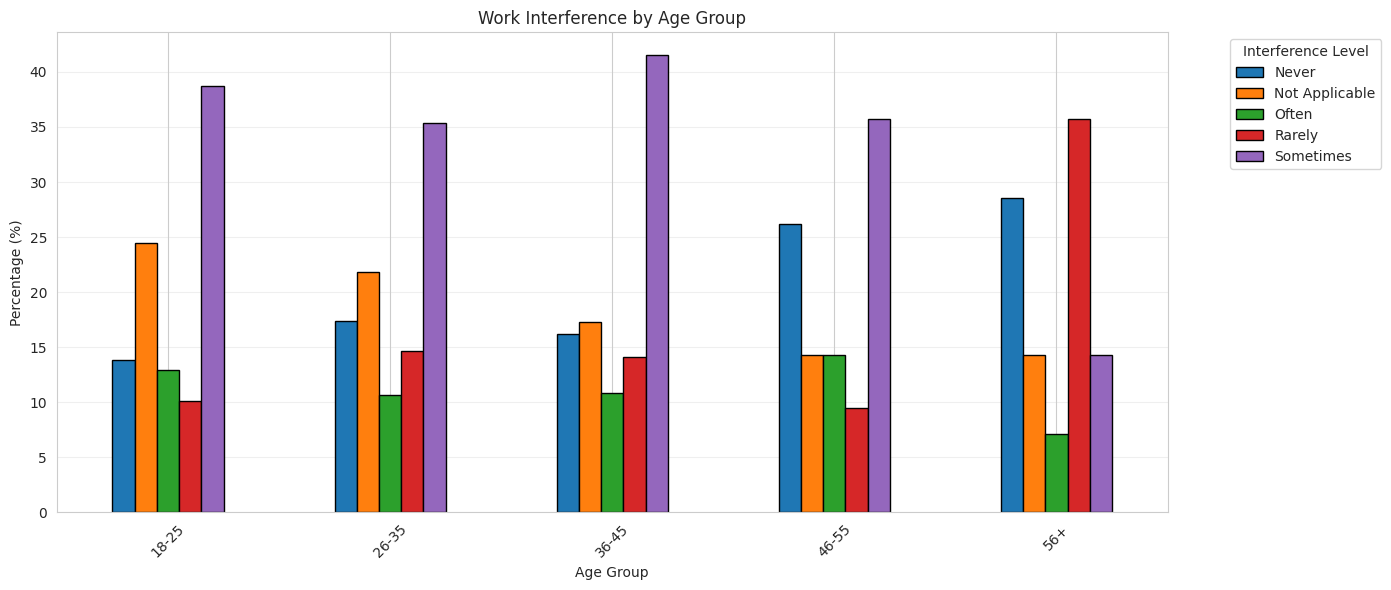

In [33]:
plt.figure(figsize=(14, 6))
age_work = pd.crosstab(df_clean['Age_Group'], df_clean['work_interfere'], normalize='index') * 100
age_work.plot(kind='bar', stacked=False, edgecolor='black', figsize=(14, 6))
plt.xlabel('Age Group')
plt.ylabel('Percentage (%)')
plt.title('Work Interference by Age Group')
plt.legend(title='Interference Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

**Insights:** Different age groups experience varying levels of work interference

#### Chart 16: Mental Health Consequences Perception

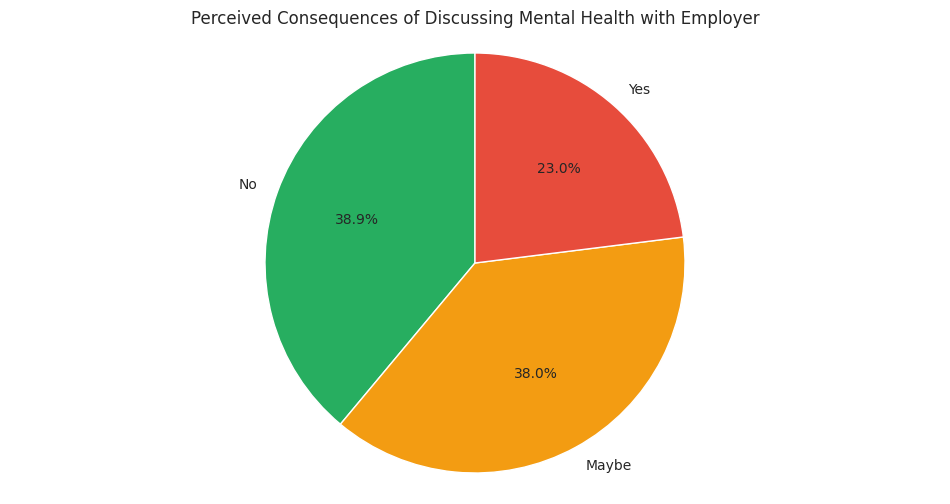

In [34]:
plt.figure(figsize=(12, 6))
consequence_counts = df_clean['mental_health_consequence'].value_counts()
plt.pie(consequence_counts.values, labels=consequence_counts.index, autopct='%1.1f%%',
        startangle=90, colors=['#27ae60', '#f39c12', '#e74c3c'])
plt.title('Perceived Consequences of Discussing Mental Health with Employer')
plt.axis('equal')
plt.show()

**Insights:** Reveals stigma levels and fear of consequences

#### Chart 17: Willingness to Discuss with Coworkers vs Supervisor

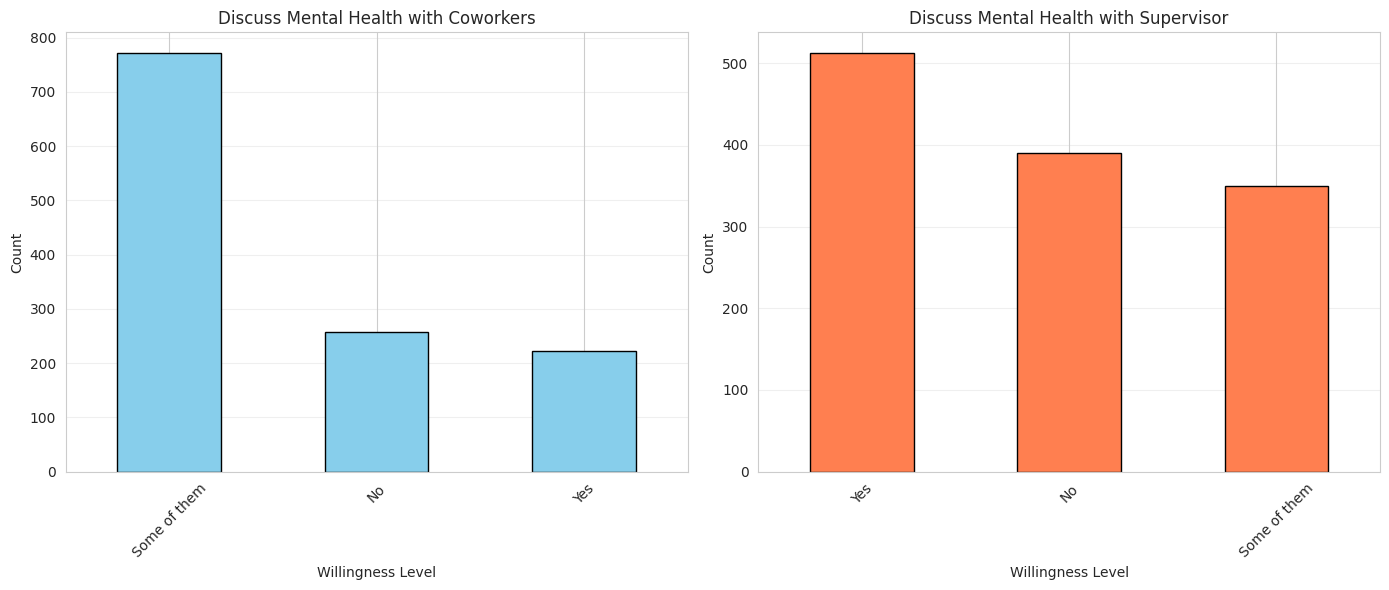

In [35]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
coworker_counts = df_clean['coworkers'].value_counts()
coworker_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Willingness Level')
plt.ylabel('Count')
plt.title('Discuss Mental Health with Coworkers')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
supervisor_counts = df_clean['supervisor'].value_counts()
supervisor_counts.plot(kind='bar', color='coral', edgecolor='black')
plt.xlabel('Willingness Level')
plt.ylabel('Count')
plt.title('Discuss Mental Health with Supervisor')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

**Insights:** Compares comfort levels - often more willing to discuss with coworkers than supervisors

#### Chart 18: Mental vs Physical Health Treatment Comparison

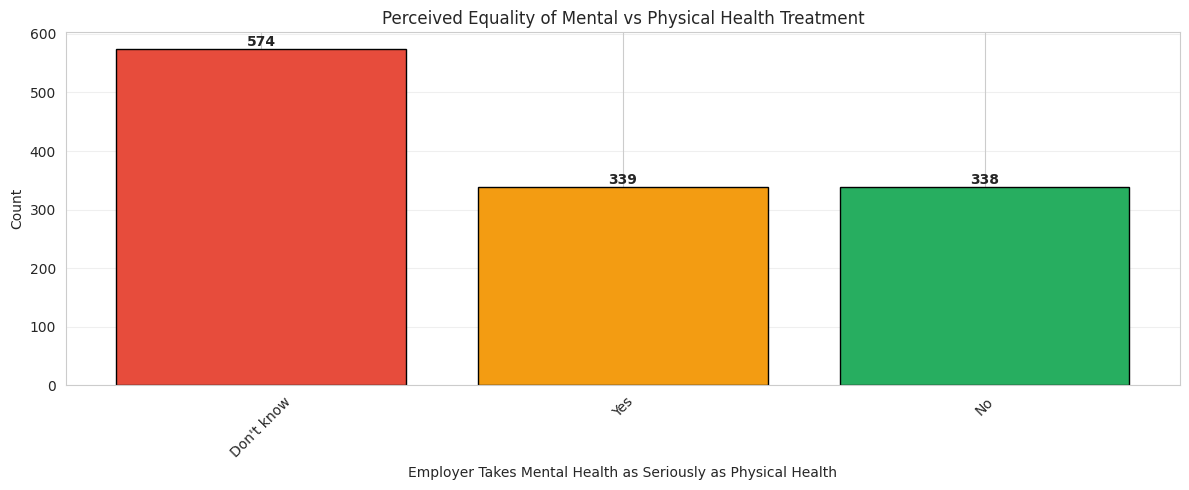

In [36]:
plt.figure(figsize=(12, 5))
mental_vs_physical = df_clean['mental_vs_physical'].value_counts()
colors = ['#e74c3c', '#f39c12', '#27ae60']
bars = plt.bar(mental_vs_physical.index, mental_vs_physical.values, color=colors, edgecolor='black')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}',
             ha='center', va='bottom', fontweight='bold')

plt.xlabel('Employer Takes Mental Health as Seriously as Physical Health')
plt.ylabel('Count')
plt.title('Perceived Equality of Mental vs Physical Health Treatment')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

**Insights:** Reveals if companies treat mental and physical health equally - key culture indicator

#### Chart 19: Wellness Program Participation

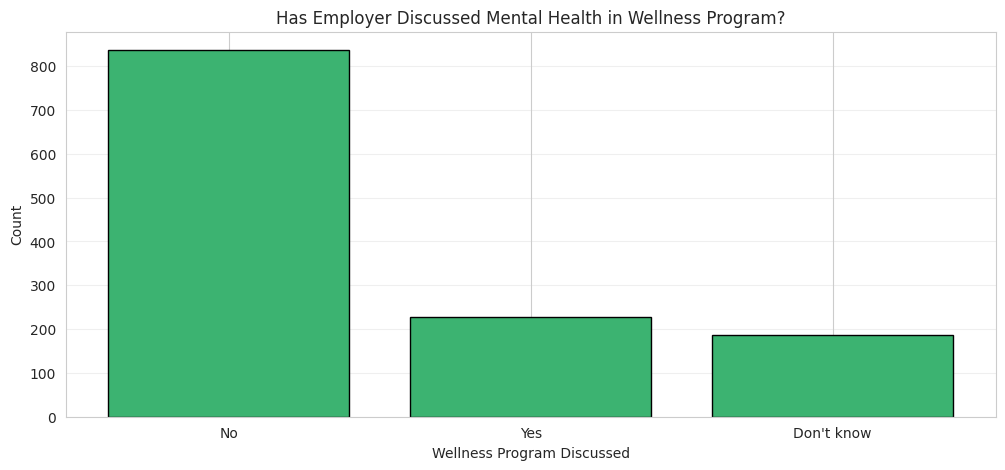

wellness_program
No            837
Yes           227
Don't know    187
Name: count, dtype: int64


In [37]:
plt.figure(figsize=(12, 5))
wellness_counts = df_clean['wellness_program'].value_counts()
plt.bar(wellness_counts.index, wellness_counts.values, color='mediumseagreen', edgecolor='black')
plt.xlabel('Wellness Program Discussed')
plt.ylabel('Count')
plt.title('Has Employer Discussed Mental Health in Wellness Program?')
plt.grid(axis='y', alpha=0.3)
plt.show()

print(wellness_counts)

**Insights:** Shows how many companies actively promote mental health awareness

#### Chart 20: Observed Consequences

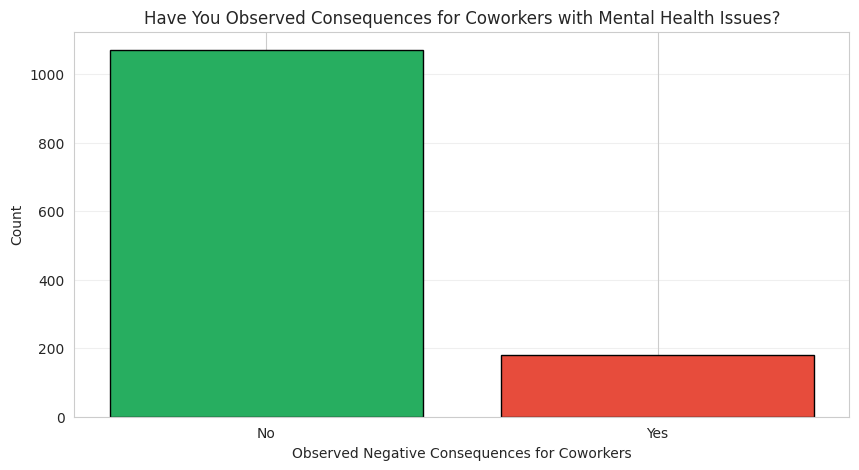


14.5% have observed negative consequences for coworkers


In [38]:
plt.figure(figsize=(10, 5))
obs_counts = df_clean['obs_consequence'].value_counts()
colors = ['#27ae60', '#e74c3c']
plt.bar(obs_counts.index, obs_counts.values, color=colors, edgecolor='black')
plt.xlabel('Observed Negative Consequences for Coworkers')
plt.ylabel('Count')
plt.title('Have You Observed Consequences for Coworkers with Mental Health Issues?')
plt.grid(axis='y', alpha=0.3)
plt.show()

pct_yes = (obs_counts.get('Yes', 0) / len(df_clean)) * 100
print(f'\n{pct_yes:.1f}% have observed negative consequences for coworkers')

**Insights:** Direct evidence of workplace stigma and discrimination

#### Chart 21: Leave Ease Distribution

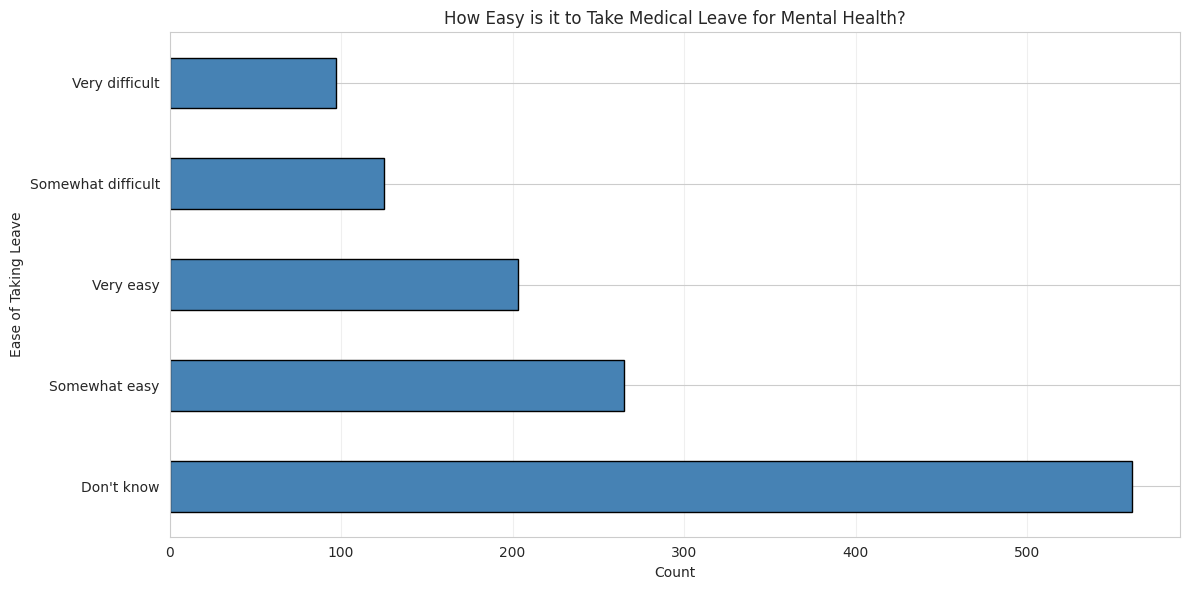

In [39]:
plt.figure(figsize=(12, 6))
leave_counts = df_clean['leave'].value_counts()
leave_counts.plot(kind='barh', color='steelblue', edgecolor='black')
plt.xlabel('Count')
plt.ylabel('Ease of Taking Leave')
plt.title('How Easy is it to Take Medical Leave for Mental Health?')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

**Insights:** Accessibility of mental health accommodations - key support indicator

## **5. Solution to Business Objective**

#### Recommendations:

**1. Reduce Stigma:**
- Leadership should openly discuss mental health
- Share success stories of treatment
- Train managers on mental health conversations

**2. Improve Access:**
- Provide comprehensive mental health benefits
- Ensure confidential, easy access to resources
- Offer multiple treatment modalities (therapy, coaching, apps)

**3. Gender-Specific Outreach:**
- Target men with tailored messaging
- Create safe spaces for all genders
- Address unique stressors for trans/non-binary employees

**4. Company Culture:**
- Integrate mental health into wellness programs
- Make leave policies clear and accessible
- Treat mental health equal to physical health

**5. Preventive Measures:**
- Screen high-risk groups (family history)
- Address workplace stressors causing interference
- Provide stress management training

**Expected Outcomes:**
- Improved productivity and engagement
- Reduced turnover and absenteeism
- Better company reputation
- Healthier, happier workforce

# **Conclusion**

his EDA reveals mental health is a significant concern in tech, affecting ~40-50% of workers. Key findings:

1. **High Treatment Rates:** Nearly half seek treatment, showing reduced stigma but also high prevalence
2. **Gender Gaps:** Men seek treatment less despite similar issues - need targeted outreach
3. **Family History:** Strong predictor of mental health issues and treatment
4. **Work Impact:** Mental health significantly interferes with productivity
5. **Support Matters:** Benefits and wellness programs correlate with better outcomes
6. **Stigma Persists:** Many fear consequences and observed discrimination

**Business Value:**
Investing in comprehensive mental health support provides strong ROI through improved retention, productivity, and culture. Companies must:
- Normalize mental health discussions
- Provide accessible, confidential resources
- Train leadership and managers
- Create inclusive policies

The data proves mental health support isn't just ethical - it's essential for business success.

### ***Completed! 21+ Charts with Comprehensive Insights***

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
